# Тестирование и оптимизация гипотез для улучшения бизнес-процессов

Импортируем необходимые библиотеки

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

***Выбор гипотезы***

У нас есть файл с гипотезами, где указаны такие параметры, как Reach, Impact, Confidence и Effort. На основе этих данных мы выбираем наиболее перспективную гипотезу для дальнейшего тестирования, оценивая, какая из них может дать наибольшее влияние при минимальных затратах. Для этого мы используем метрики ICE и RICE, которые помогают приоритизировать гипотезы: ICE учитывает влияние, уверенность и затраты, а RICE добавляет еще и охват, что позволяет точнее оценить потенциал каждой гипотезы.

In [90]:
hyp = pd.read_csv('hyp.csv')

In [91]:
hyp.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [92]:
hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


Добавим в таблицу столбцы 'ICE' и 'RICE', ниже представлены формулы для данных метрик.
    
ICE = Impact * Conf / efforts

RICE = Reach * Impact * Conf / efforts

In [93]:
hyp['ICE'] = hyp['Impact'] * hyp['Confidence'] / hyp['Efforts']
hyp['RICE'] = hyp['Reach'] * hyp['Impact'] * hyp['Confidence'] / hyp['Efforts']


In [94]:
hyp

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2


Отсортируем по убыванию значения метрик.

In [95]:
hyp.sort_values('ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


In [96]:
hyp.sort_values('RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


Выбираем 7-ю гипотезу, так как она имеет наибольшее значение по метрике RICE, что означает, что она обладает высоким охватом, значительным влиянием, высокой уверенностью в успехе и умеренными затратами на реализацию. Это делает ее наиболее перспективной для дальнейшего тестирования.

***Тестирование***


У нас есть два датасета с результатами A/B тестирования: orders.csv и vis.csv. Первый содержит информацию о заказах, а второй — данные о посещениях. Мы будем использовать эти данные для анализа результатов тестирования и оценки эффективности выбранной гипотезы.

Для начала нам необходимо исследовать эти датасеты на корректность данных: проверить наличие пропущенных значений, аномальных или ошибочных записей, чтобы убедиться, что данные готовы к дальнейшему анализу.

In [97]:
orders = pd.read_csv('ord.csv')

In [98]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [99]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [100]:
vis = pd.read_csv('vis.csv')

In [101]:
vis

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [102]:
vis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [103]:
orders['date'].min(), orders['date'].max()

('2019-08-01', '2019-08-31')

In [104]:
vis['date'].min(), vis['date'].max()

('2019-08-01', '2019-08-31')

In [105]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
vis['date'] = pd.to_datetime(vis['date'], format='%Y-%m-%d')

Видим, что пропусков в датасетах нет, и даты совпадают, но имеют Dtype object, для дальнейшей работы с ними изменим тип данных.

Видим, что пропусков в датасетах нет, и даты совпадают, но имеют Dtype object, для дальнейшей работы с ними изменим тип данных

In [106]:
orders['date'].dtype

dtype('<M8[ns]')

In [107]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [108]:
orders['date'].nunique(), vis['date'].nunique()

(31, 31)

In [109]:
orders.duplicated().sum(), vis.duplicated().sum()

(np.int64(0), np.int64(0))

In [110]:
orders['transactionId'].duplicated().sum()

np.int64(0)

Дубликаты также отсутствуют, а значит можно приступать к исследованию.

***Иследование***

Для начала посчитаем количество людей в тесте и контроле.

In [111]:
vis_a = vis[vis['group'] == 'A']['visitors'].sum()

In [112]:
vis_b = vis[vis['group'] == 'B']['visitors'].sum()

In [113]:
vis_a, vis_b

(np.int64(18736), np.int64(18916))

Видим, что отличие незначительное, то есть в этом плане все корректно.
Создадим датафрейм, в котором будут колонки 'date', 'A', 'B', чтобы затем построить график.

In [114]:
day = vis.pivot_table(index='date', columns='group', values='visitors', aggfunc='mean')
day.head()

group,A,B
date,,
2019-08-01,719.0,713.0
2019-08-02,619.0,581.0
2019-08-03,507.0,509.0
2019-08-04,717.0,770.0
2019-08-05,756.0,707.0


Построим график 'Количество посетителей по дням' для каждой группы.

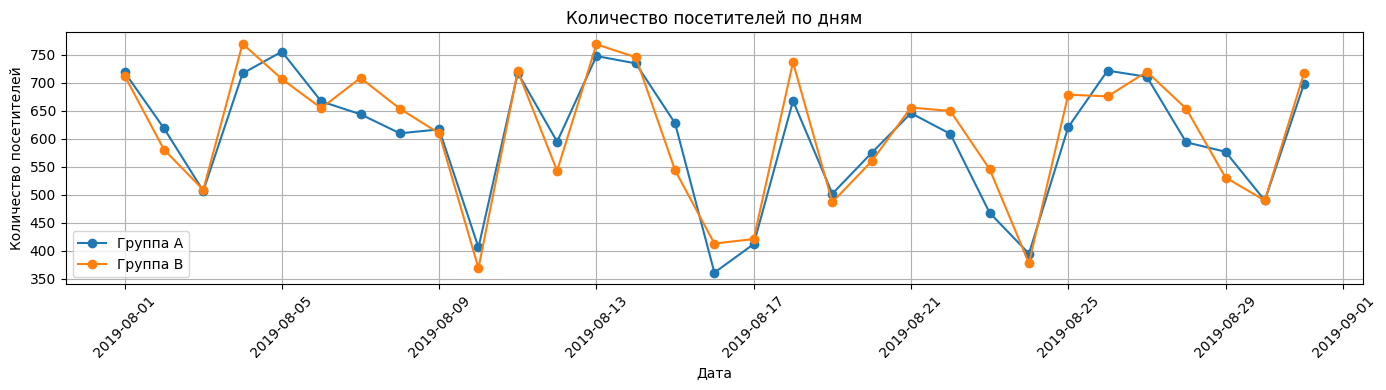

In [115]:
plt.figure(figsize=(14, 4))
plt.plot(day.index, day['A'], label='Группа A', marker='o')
plt.plot(day.index, day['B'], label='Группа B', marker='o')

# Настройка графика
plt.title('Количество посетителей по дням')
plt.xlabel('Дата')
plt.ylabel('Количество посетителей')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Поворот меток дат для лучшей читаемости

# Отображение графика
plt.tight_layout()
plt.show()

Видим, что числа для каждой группы отличаются несильно, а значит все корректно, можно продолжать.

Теперь перейдем к датасету 'orders'.

In [116]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Найдем и сравним в нем количество людей в группах теста и контроля.

In [117]:
sub = orders.groupby(['visitorId', 'group']).count().reset_index()

In [118]:
sub['group'].value_counts()

group
B    586
A    503
Name: count, dtype: int64

In [119]:
(sub['group'].value_counts()[0] - sub['group'].value_counts()[1]) / sub['group'].value_counts()[1]

/var/folders/kd/_2qt2l6x10d9__g7c7vj_vq40000gn/T/ipykernel_10836/4226088911.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (sub['group'].value_counts()[0] - sub['group'].value_counts()[1]) / sub['group'].value_counts()[1]
/var/folders/kd/_2qt2l6x10d9__g7c7vj_vq40000gn/T/ipykernel_10836/4226088911.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (sub['group'].value_counts()[0] - sub['group'].value_counts()[1]) / sub['group'].value_counts()[1]
/var/folders/kd/_2qt2l6x10d9__g7c7vj_vq40000gn/T/ipykernel_10836/4226088911.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future 

np.float64(0.16500994035785288)

Различие в 16.5 % так же является несущественным. Теперь проверим, есть ли у нас люди, попавшие одновременно в 2 группы.

In [120]:
group_vis = orders.groupby('visitorId')['group'].nunique()
group_vis

visitorId
5114589       1
6958315       1
8300375       2
11685486      1
39475350      1
             ..
4266935830    2
4278982564    1
4279090005    1
4281247801    1
4283872382    1
Name: group, Length: 1031, dtype: int64

Даже так видим, что такие имеются, это является большой ошибкой при проведении аб-тестирования, избавимся от них.

In [121]:
trash_vis = group_vis[group_vis > 1]

In [122]:
trash_vis[:6]

visitorId
8300375      2
199603092    2
232979603    2
237748145    2
276558944    2
351125977    2
Name: group, dtype: int64

In [123]:
len(trash_vis)

58

In [124]:
orders_cleaned = orders[~orders['visitorId'].isin(trash_vis.index)]

Очистили датасет, посмотрим теперь, сколько человек в тесте и контроле

In [125]:
sub = orders_cleaned.groupby(['visitorId', 'group']).count().reset_index()
sub['group'].value_counts()

group
B    528
A    445
Name: count, dtype: int64

In [126]:
(sub['group'].value_counts()[0] - sub['group'].value_counts()[1]) / sub['group'].value_counts()[1]

/var/folders/kd/_2qt2l6x10d9__g7c7vj_vq40000gn/T/ipykernel_10836/4226088911.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (sub['group'].value_counts()[0] - sub['group'].value_counts()[1]) / sub['group'].value_counts()[1]
/var/folders/kd/_2qt2l6x10d9__g7c7vj_vq40000gn/T/ipykernel_10836/4226088911.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (sub['group'].value_counts()[0] - sub['group'].value_counts()[1]) / sub['group'].value_counts()[1]
/var/folders/kd/_2qt2l6x10d9__g7c7vj_vq40000gn/T/ipykernel_10836/4226088911.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future 

np.float64(0.18651685393258427)

Итак, процент ожидаемо вырос, но незначительно, можем продолжить исследование.

***Выбросы***

Проверим данные на выбросы.

In [127]:
ord_vis = orders_cleaned.groupby('visitorId')['transactionId'].nunique()
ord_vis.sort_values(ascending=False)

visitorId
3967698036    3
249864742     3
2108163459    3
2988190573    3
3908431265    3
             ..
1438226485    1
1452540367    1
1455323168    1
1455861274    1
4283872382    1
Name: transactionId, Length: 973, dtype: int64

In [128]:
ord_vis.describe()

count    973.000000
mean       1.044193
std        0.238090
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: transactionId, dtype: float64

Видим, что в очищенном датасете orders в колонке с числом транзакций выбросов нет. Посмотрим теперь с помощью гистограммы на распределение количества заказов по пользователям.

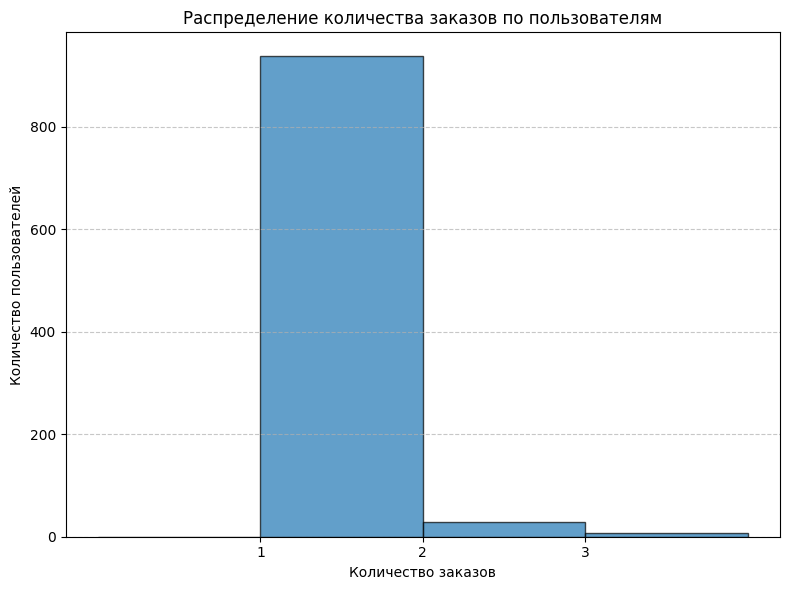

In [129]:
plt.figure(figsize=(8, 6))
plt.hist(ord_vis, bins=range(0, ord_vis.max() + 2), edgecolor='black', alpha=0.7)


plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.xticks(range(1, ord_vis.max() + 1))  # Метки по оси X
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Отображение графика
plt.tight_layout()
plt.show()

Теперь рассмотрим на предмет выбросов колонку с выручкой.

In [130]:
orders_cleaned['revenue'].describe()

count    1.016000e+03
mean     8.300815e+03
std      4.212199e+04
min      5.000000e+01
25%      1.190000e+03
50%      2.955000e+03
75%      8.134250e+03
max      1.294500e+06
Name: revenue, dtype: float64

Text(0.5, 1.0, 'Распределение выручки с одного заказа')

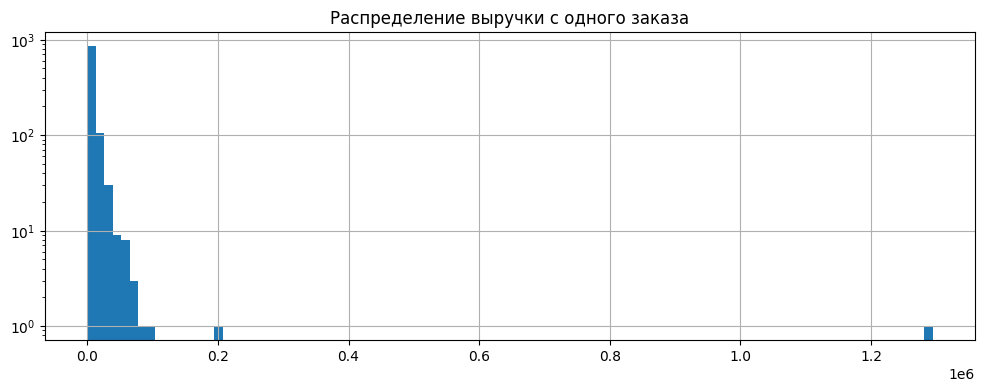

In [131]:
plt.figure(figsize=(12, 4))
plt.hist(orders_cleaned['revenue'], bins=100)
plt.grid()
plt.yscale('log')
plt.title('Распределение выручки с одного заказа')

Text(0.5, 1.0, 'Распределение выручки с одного заказа')

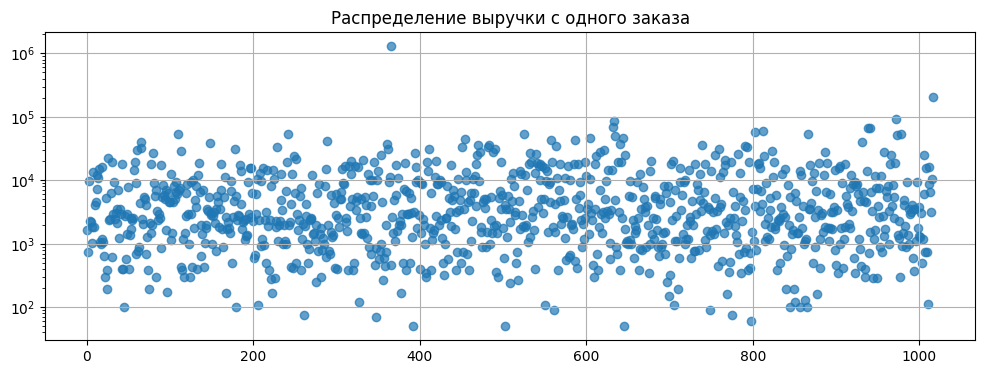

In [132]:

plt.figure(figsize=(12, 4))
plt.scatter(pd.Series(range(1, len(orders_cleaned) + 1)), orders_cleaned['revenue'], alpha=0.7)
plt.grid()
plt.yscale('log')
plt.title('Распределение выручки с одного заказа')

In [133]:
orders_cleaned['revenue'].sort_values(ascending=False).head()

425     1294500
1196     202740
1136      92550
744       86620
743       67990
Name: revenue, dtype: int64

In [134]:
np.percentile(orders_cleaned['revenue'], 95)

np.float64(26785.0)

Видим, что здесь выбросы все-таки имеются, но в незначительном количестве, поэтому можем просто вручную их убрать, выбрав за верхнюю границу, например, 100000.

In [135]:
orders_cleaned_2 = orders_cleaned[orders_cleaned['revenue'] <= 100000]
orders_cleaned_2

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A


Теперь построим таблицу с кумулятивной выручкой по дням для каждой группы.

In [136]:
rev_date = orders_cleaned.pivot_table(index='date', columns='group', values='revenue', aggfunc='sum')
rev_date

group,A,B
date,,
2019-08-01,142779,59758
2019-08-02,91602,162043
2019-08-03,112473,67049
2019-08-04,41176,96890
2019-08-05,86383,89908
2019-08-06,40919,214842
2019-08-07,123248,219164
2019-08-08,88639,150141
2019-08-09,134237,103166


In [137]:
revc_day = rev_date.cumsum(axis=0)
revc_day

group,A,B
date,,
2019-08-01,142779,59758
2019-08-02,234381,221801
2019-08-03,346854,288850
2019-08-04,388030,385740
2019-08-05,474413,475648
2019-08-06,515332,690490
2019-08-07,638580,909654
2019-08-08,727219,1059795
2019-08-09,861456,1162961


Построим график для датасета с выбросом и без, чтоб наглядно увидеть, насколько он выбивался из общей массы. Будем делать так и далее, в качестве эксперимента.

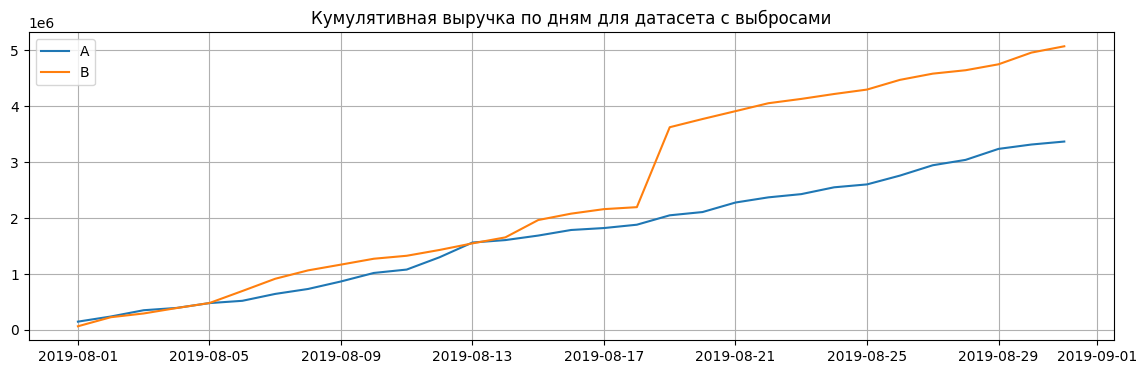

In [165]:
plt.figure(figsize=(14, 4))
plt.plot(revc_day['A'], label='A')
plt.plot(revc_day['B'], label='B')
plt.legend()
plt.grid()
plt.title("Кумулятивная выручка по дням для датасета с выбросами")
plt.show()

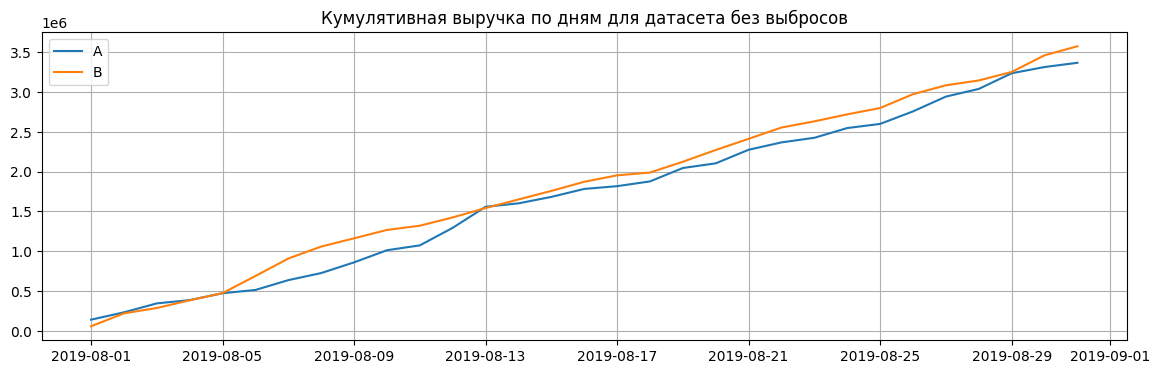

In [166]:
revc_day_clear = orders_cleaned_2.pivot_table(index='date', columns='group', values='revenue', aggfunc='sum').cumsum(axis=0)

plt.figure(figsize=(14, 4))
plt.plot(revc_day_clear['A'], label='A')
plt.plot(revc_day_clear['B'], label='B')
plt.legend()
plt.grid()
plt.title("Кумулятивная выручка по дням для датасета без выбросов")
plt.show()

Теперь построим таблицу с кумулятивным количеством транзакций, чтоб затем найти кумулятивный средний чек. Будем делать это как и выше для датасета с выбросами и без.

In [140]:
orders_cum = orders_cleaned.pivot_table(index='date', columns='group', values='transactionId', aggfunc='nunique').cumsum(axis=0)
orders_cum.head()

group,A,B
date,,
2019-08-01,23,17
2019-08-02,42,40
2019-08-03,66,54
2019-08-04,77,68
2019-08-05,99,89


In [141]:
acc = revc_day / orders_cum

In [142]:
acc

group,A,B
date,,
2019-08-01,6207.782609,3515.176471
2019-08-02,5580.500000,5545.025000
2019-08-03,5255.363636,5349.074074
2019-08-04,5039.350649,5672.647059
2019-08-05,4792.050505,5344.359551
2019-08-06,4520.456140,6165.089286
2019-08-07,4912.153846,6738.177778
2019-08-08,5050.131944,6750.286624
2019-08-09,5557.780645,6607.732955


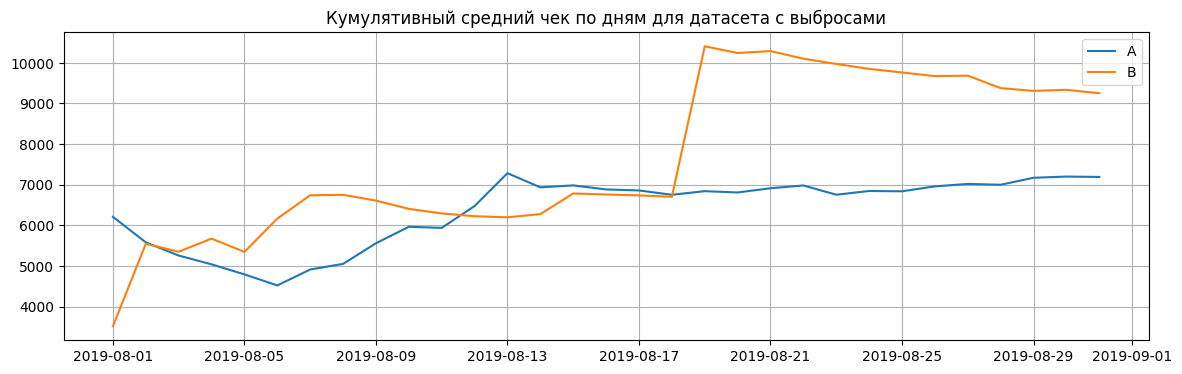

In [167]:

plt.figure(figsize=(14, 4))
plt.plot(acc['A'], label='A')
plt.plot(acc['B'], label='B')
plt.legend()
plt.grid()
plt.title("Кумулятивный средний чек по дням для датасета с выбросами")
plt.show()

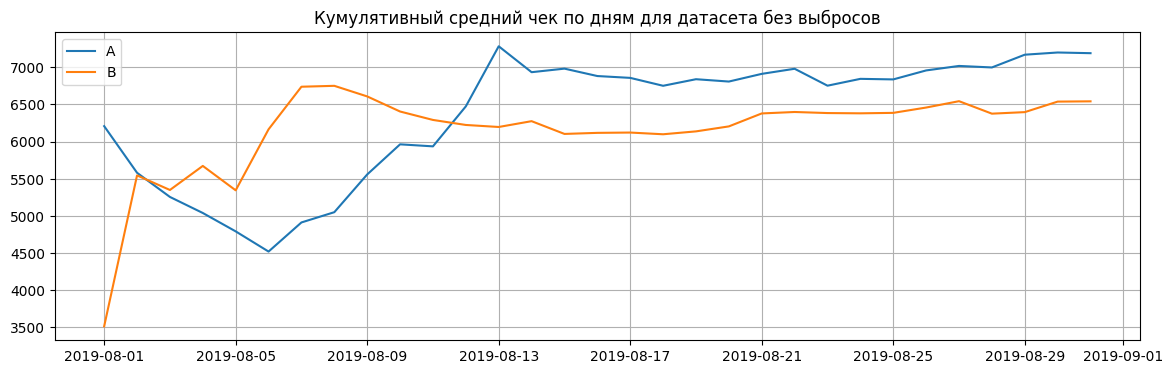

In [168]:
ord_cum_clear = orders_cleaned_2.pivot_table(index='date', columns='group', values='transactionId', aggfunc='nunique').cumsum(axis=0)
acc_clear = revc_day_clear / ord_cum_clear
plt.figure(figsize=(14, 4))
plt.plot(acc_clear['A'], label='A')
plt.plot(acc_clear['B'], label='B')
plt.legend()
plt.grid()
plt.title("Кумулятивный средний чек по дням для датасета без выбросов")
plt.show()

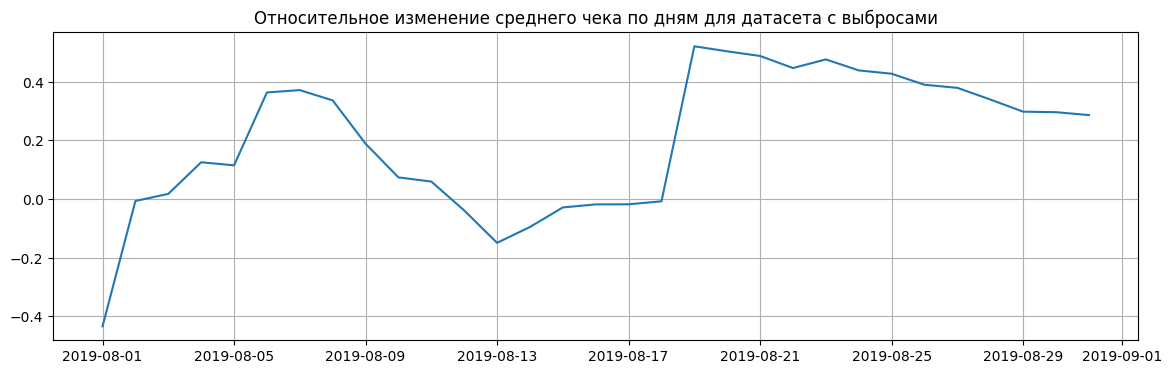

In [169]:
acc['dif'] = (acc['B'] - acc['A']) / acc['A']
plt.figure(figsize=(14, 4))
plt.plot(acc['dif'])
plt.grid()
plt.title("Относительное изменение среднего чека по дням для датасета с выбросами")
plt.show()

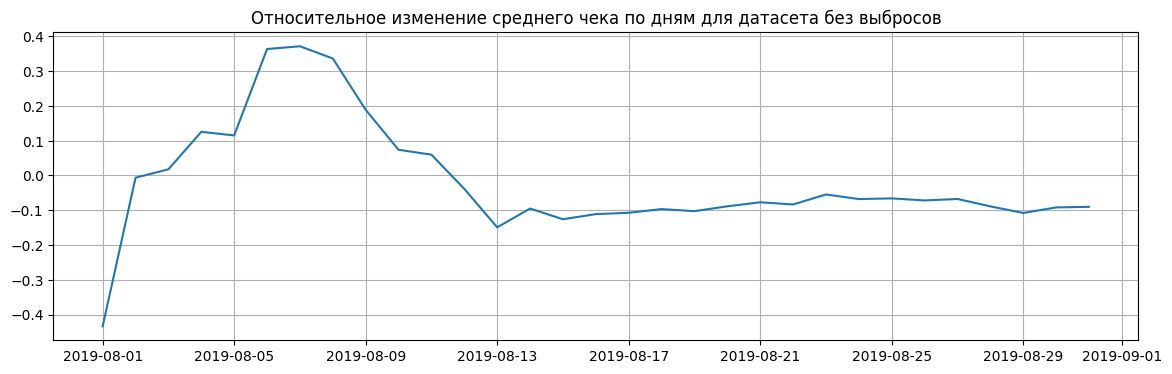

In [170]:
acc_clear['dif'] = (acc_clear['B'] - acc_clear['A']) / acc_clear['A']
plt.figure(figsize=(14, 4))
plt.plot(acc_clear['dif'])
plt.grid()
plt.title("Относительное изменение среднего чека по дням для датасета без выбросов")
plt.show()

Можем четко видеть влияние выброса, также отмечаем, что разница между средними чеками двух групп на дистанции становится почти постоянной — у группы А средний чек больше на 10%.

***Проверка гипотезы с помощью статистичексих тестов***

Для начала поставим следующую гипотезу:  
•	Нулевая гипотеза (H₀): Распределения выручки в группах A и B одинаковы, т.е. нет значимых различий между ними.  
•	Альтернативная гипотеза (H₁): Распределения выручки в группах A и B различаются, т.е. изменения в группе B привели к статистически значимым различиям в выручке.  
Рассмотрим как и выше очищенный датасет и нет.  
Для проверки гипотезы будем использовать тест Манна-Уитни, так как в нашем случае, если распределение выручки в группах A и B может быть различным, использование теста Манна-Уитни позволяет корректно оценить, есть ли статистически значимые различия между группами, не требуя строгих предположений о распределении данных. Ошибку 1-го рода возьмем 5%.


In [147]:
import scipy.stats as st

In [148]:
aplha = .05

In [149]:
orders_A = orders_cleaned[orders_cleaned['group'] == 'A']['revenue']
orders_B = orders_cleaned[orders_cleaned['group'] == 'B']['revenue']
orders_A_cl = orders_cleaned_2[orders_cleaned_2['group'] == 'A']['revenue']
orders_B_cl = orders_cleaned_2[orders_cleaned_2['group'] == 'B']['revenue']


In [150]:
res = st.mannwhitneyu(orders_A, orders_B, alternative='two-sided')
p_value = res.pvalue
res_cl = st.mannwhitneyu(orders_A_cl, orders_B_cl, alternative='two-sided')
p_value_cl = res_cl.pvalue

In [151]:
p_value, p_value_cl

(np.float64(0.8294908998149533), np.float64(0.7515257368753675))

Видим, что в обоих случаях p_value больше alpha, причем значительно, а значит можно сделать вывод, что значения выручек у групп из одной генеральной совокупности, то есть значимых различий нет, выручка примерно одинакова, что уже ставит под сомнения реализацию нашей гипотезы.

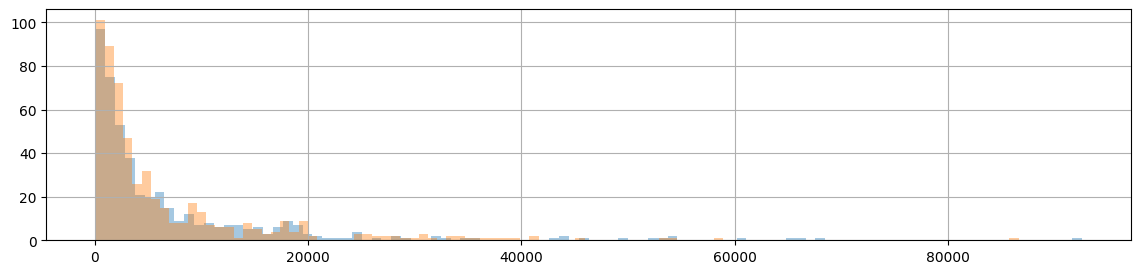

In [152]:
plt.figure(figsize=(14, 3))
plt.hist(orders_A_cl, alpha=.4, bins=100)
plt.hist(orders_B_cl, alpha=.4, bins=100)
plt.grid()
plt.show()

Далее изучим еще одну метрику - конверсию. Для этого нам нужно создать сводные таблицы с кумулятивным кол-вом посещений и транзакций.Сделаем так же для обоих датасетов.

In [153]:
vis_cum = vis.pivot_table(index='date', columns='group', values='visitors', aggfunc='mean').cumsum(axis=0)
vis_cum.head()

group,A,B
date,,
2019-08-01,719.0,713.0
2019-08-02,1338.0,1294.0
2019-08-03,1845.0,1803.0
2019-08-04,2562.0,2573.0
2019-08-05,3318.0,3280.0


In [154]:
ord_cum = orders_cleaned.pivot_table(index='date', columns='group', values='transactionId', aggfunc='nunique').cumsum(axis=0)
conv = ord_cum / vis_cum
conv

group,A,B
date,,
2019-08-01,0.031989,0.023843
2019-08-02,0.031390,0.030912
2019-08-03,0.035772,0.029950
2019-08-04,0.030055,0.026428
2019-08-05,0.029837,0.027134
2019-08-06,0.028607,0.028463
2019-08-07,0.028084,0.029070
2019-08-08,0.027486,0.029634
2019-08-09,0.026469,0.029790


In [155]:
ord_cum_cleaned = orders_cleaned_2.pivot_table(index='date', columns='group', values='transactionId', aggfunc='nunique').cumsum(axis=0)
conv_cleaned = ord_cum_cleaned / vis_cum
conv_cleaned

group,A,B
date,,
2019-08-01,0.031989,0.023843
2019-08-02,0.031390,0.030912
2019-08-03,0.035772,0.029950
2019-08-04,0.030055,0.026428
2019-08-05,0.029837,0.027134
2019-08-06,0.028607,0.028463
2019-08-07,0.028084,0.029070
2019-08-08,0.027486,0.029634
2019-08-09,0.026469,0.029790


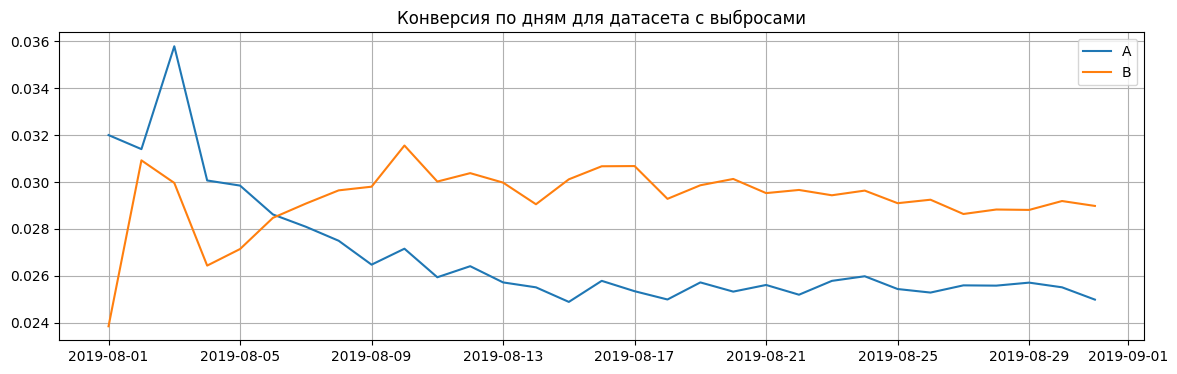

In [156]:
plt.figure(figsize=(14, 4))
plt.plot(conv['A'], label='A')
plt.plot(conv['B'], label='B')
plt.legend()
plt.grid()
plt.title("Конверсия по дням для датасета с выбросами")
plt.show()

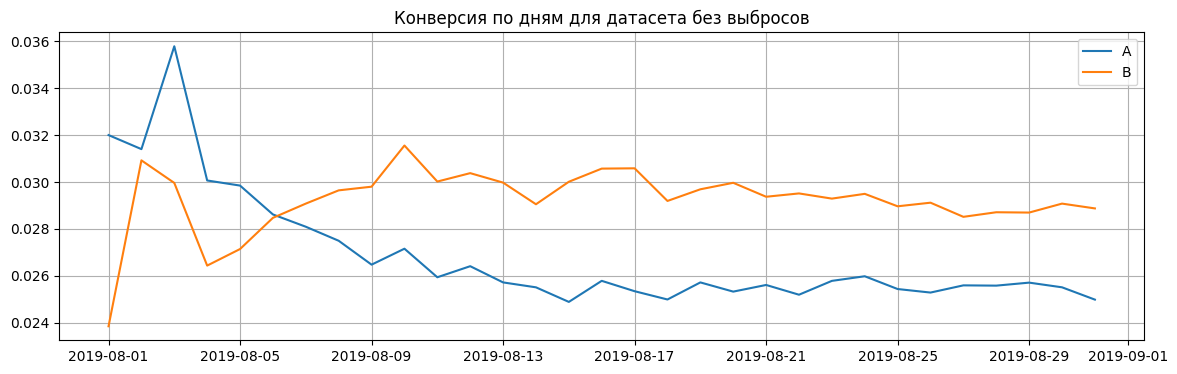

In [157]:
plt.figure(figsize=(14, 4))
plt.plot(conv_cleaned['A'], label='A')
plt.plot(conv_cleaned['B'], label='B')
plt.legend()
plt.grid()
plt.title("Конверсия по дням для датасета без выбросов")
plt.show()

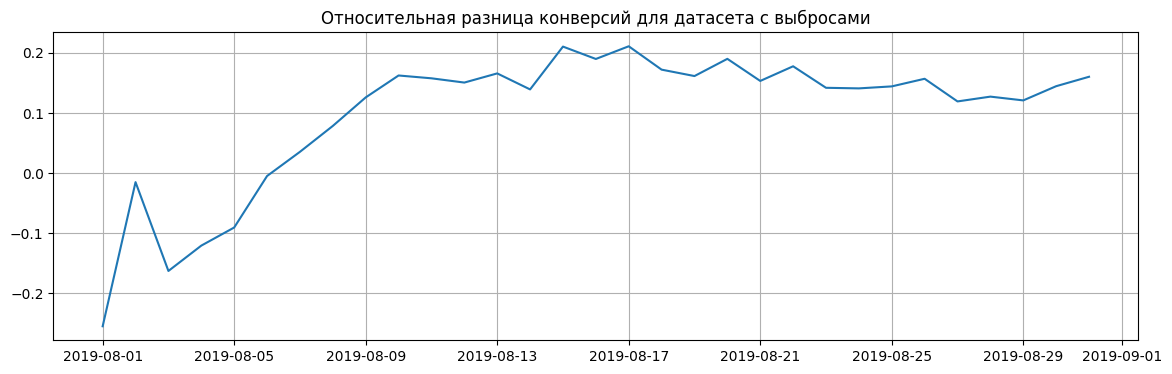

In [158]:
conv['dif'] = (conv['B'] - conv['A']) / conv['A']
plt.figure(figsize=(14, 4))
plt.plot(conv['dif'])
plt.grid()
plt.title("Относительная разница конверсий для датасета с выбросами")
plt.show()

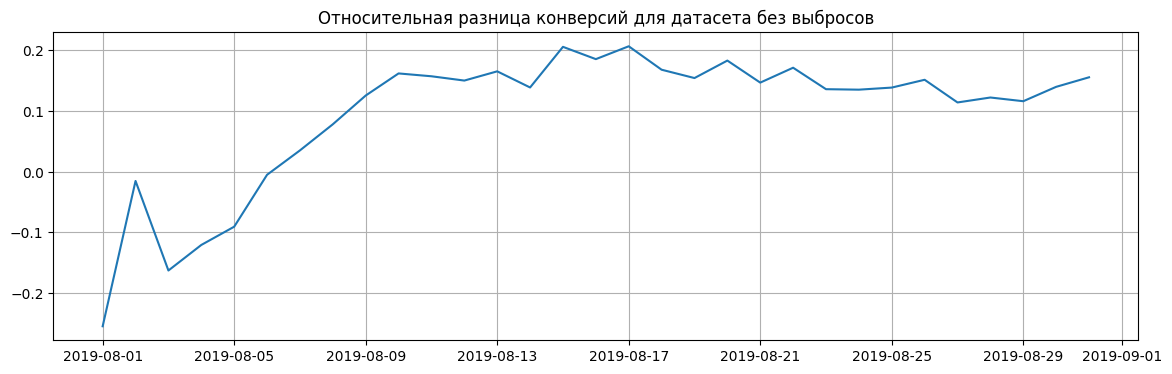

In [159]:
conv_cleaned['dif'] = (conv_cleaned['B'] - conv_cleaned['A']) / conv_cleaned['A']
plt.figure(figsize=(14, 4))
plt.plot(conv_cleaned['dif'])
plt.grid()
plt.title("Относительная разница конверсий для датасета без выбросов")
plt.show()

Итак, мы можем наблюдать, что у группы B конверсия выше в обоих случаях, поэтому можем поставить гипотезу следующим образом:  
•Нулевая гипотеза (H₀): Конверсии в группах A и B одинаковы, т.е. изменения, проведенные в группе B, не привели к статистически значимым различиям в конверсии.  
•Альтернативная гипотеза (H₁): Конверсии в группах A и B различаются, т.е. изменения в группе B привели к статистически значимым различиям в конверсии.  
Будем использовать z-тест, ниже представим схему z-теста для нашего случая. Будем опять-таки делать для двух вариантов.

A - n пользователей, x пользователей успешны
B - m пользователей, y пользоватлей успешны

p_A = x / n
p_B = y / m

H_0 p_A=p_b=p_0

p_A - p_B ~ N(0, g^2)

D(p_A - p_B) = D(p_a) + D(p_b)

D(p_a) = p_0 * (1 - p_0) / n
D(p_b) = p_0 * (1 - p_0) / m

SE = sqrt(p_0 * (1 - p_0) * (1 / n + 1 / m))

Z = (p_a - p_b) / SE

In [160]:
aplha = .05

In [161]:
def find_p(conv_cm, orders_cm):
    p_A = conv_cm['A'][-1]
    p_B = conv_cm['B'][-1]
    n_A = vis_cum['A'][-1]
    n_B = vis_cum['B'][-1]
    p = (orders_cm['A'][-1] + orders_cm['B'][-1]) / (n_A + n_B)
    z = (p_A - p_B) / (p * (1 - p) * (1 / n_A + 1 / n_B)) **.5
    dist = st.norm(0, 1)
    p_v = (1 - dist.cdf(abs(z))) * 2
    return p_v

In [162]:
find_p(conv, orders_cum)

/var/folders/kd/_2qt2l6x10d9__g7c7vj_vq40000gn/T/ipykernel_10836/3574986426.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_A = conv_cm['A'][-1]
/var/folders/kd/_2qt2l6x10d9__g7c7vj_vq40000gn/T/ipykernel_10836/3574986426.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_B = conv_cm['B'][-1]
/var/folders/kd/_2qt2l6x10d9__g7c7vj_vq40000gn/T/ipykernel_10836/3574986426.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  n_A = 

np.float64(0.016851380434703023)

In [164]:
find_p(conv_cleaned, ord_cum_cleaned)

/var/folders/kd/_2qt2l6x10d9__g7c7vj_vq40000gn/T/ipykernel_10836/3574986426.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_A = conv_cm['A'][-1]
/var/folders/kd/_2qt2l6x10d9__g7c7vj_vq40000gn/T/ipykernel_10836/3574986426.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_B = conv_cm['B'][-1]
/var/folders/kd/_2qt2l6x10d9__g7c7vj_vq40000gn/T/ipykernel_10836/3574986426.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  n_A = 

np.float64(0.01986659212118491)

Можем видеть, что p-value в обоих случаях достаточно сильно меньше alpha, а значит отвергаем нулевую гипотезу и делаем вывод, что действительно конверсия стала выше, что несомненно идет в плюс для нашей изначальной гипотезы.

***Вывод***

Данный проект показал, что гипотеза о влиянии изменений в группе B на конверсию вызывает неоднозначные результаты. Несмотря на то, что конверсия в группе B увеличилась, наблюдается падение среднего чека, что может свидетельствовать о снижении общей эффективности изменений. Это указывает на то, что увеличение числа успешных действий не всегда приводит к улучшению ключевых бизнес-показателей, таких как выручка. Таким образом, гипотеза требует дальнейшего анализа и возможно доработки, так как результат оказался не таким однозначным, как ожидалось.

Также стоит сказать о различиях вариантов с выбросами и без. Вариант с выбросами показал, что в группе B средний чек оказался выше, однако это не отражает реальную картину. Наличие выбросов в данных искажает этот показатель, создавая ложное впечатление о значительном росте среднего чека. Это подчеркивает важность учета выбросов при анализе ключевых метрик, так как они могут существенно влиять на результаты и вводить в заблуждение при принятии решений.